In [1]:
import tensorflow as tf

In [2]:
#prevents too much memory from being used, but for my case is not working

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [3]:
for gpu in gpus:
    print(gpu)

In [4]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [5]:
ds = tfds.load('fashion_mnist', split='train')

In [6]:
type(ds)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

In [7]:
ds.as_numpy_iterator().next()

{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 18],
         [ 77],
         [227],
         [227],
         [208],
         [210],
         [225],
         [216],
         [ 85],
         [ 32],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 61],
         [100],
         [ 97],
         [ 80],
         [ 57],
         [117],
         [227],
         [238],
         [115],
         [ 49],
         [ 78],
         [106],
         [108],
         [ 71],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

In [8]:
ds.as_numpy_iterator().next().keys()

dict_keys(['image', 'label'])

In [9]:
ds.as_numpy_iterator().next()['image']

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 18],
        [ 77],
        [227],
        [227],
        [208],
        [210],
        [225],
        [216],
        [ 85],
        [ 32],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 61],
        [100],
        [ 97],
        [ 80],
        [ 57],
        [117],
        [227],
        [238],
        [115],
        [ 49],
        [ 78],
        [106],
        [108],
        [ 71],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 81],
        [105],
        [ 80],
        [ 69],
      

In [10]:
ds.as_numpy_iterator().next()['label']

np.int64(2)

In [11]:
import numpy as np

In [12]:
#setting up connection to the pipeline i.e. making an iterator

dataIterator = ds.as_numpy_iterator()

In [13]:
#getting data for a pipeline

dataIterator.next()

{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 18],
         [ 77],
         [227],
         [227],
         [208],
         [210],
         [225],
         [216],
         [ 85],
         [ 32],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 61],
         [100],
         [ 97],
         [ 80],
         [ 57],
         [117],
         [227],
         [238],
         [115],
         [ 49],
         [ 78],
         [106],
         [108],
         [ 71],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

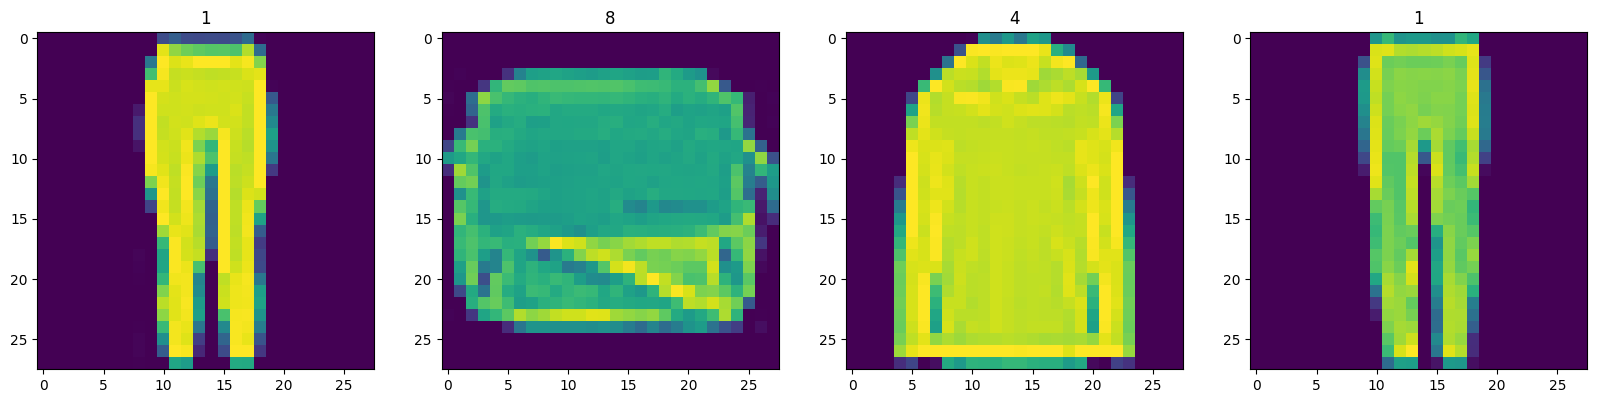

In [14]:
#setting up the subplot formatting
fig,ax = plt.subplots(ncols=4, figsize=(20,20))

#Looping four times and getting images
for idx in range(4):
    
    #getting an image and its label
    sample = dataIterator.next()
    
    #Plot the image using on a specific subplot
    ax[idx].imshow(np.squeeze(sample['image']))
    
    #adding image label as the subplot title
    ax[idx].title.set_text(sample['label'])

In [15]:
def scale_images(data):
    image = data['image']
    return image/255

In [16]:
# Reloading the dataset
ds = tfds.load('fashion_mnist', split='train')
# Running the dataset through the scale_images preprocessing step
ds = ds.map(scale_images)
# Cache the dataset for that batch
ds = ds.cache()
# Shuffle the data
ds = ds.shuffle(60000)
# Batch into 128 images per sample
ds = ds.batch(128)
# reduces the likelihood of bottlenecking
ds = ds.prefetch(64)

In [17]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

In [18]:
#Importing the sequential api for the generator and discriminator
from tensorflow.keras.models import Sequential

#Importing the layers for the neural network
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D

In [19]:
#Building the generator

def build_generator():
    model = Sequential()
    
    # takes in random values and reshapes it to 7x7x128
    model.add(Dense(7*7*128, input_dim = 128))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((7, 7, 128)))
    
    # Upsampling block 1
    model.add(UpSampling2D())
    model.add(Conv2D(128, 5, padding='same')) #128 filters/kernels each of size 5x5
    model.add(LeakyReLU(0.2))
    
    # Upsampling block 2
    model.add(UpSampling2D())
    model.add(Conv2D(128, 5, padding='same'))
    model.add(LeakyReLU(0.2))
    
    # Convolutional Block 1
    model.add(Conv2D(128, 4, padding='same')) #128 filters/kernels each of size 4x4
    model.add(LeakyReLU(0.2))
    
    # Convolutional Block 2
    model.add(Conv2D(128, 4, padding = 'same'))
    model.add(LeakyReLU(0.2))
    
    #Conv layer to get to one channel
    model.add(Conv2D(1, 4, padding='same', activation='sigmoid')) #1 filter/kernel of size 4x4

    return model

In [20]:
generator = build_generator()

e:\B Tech\3rd Year Sem 2\GenAI\Coding stuff\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
generator.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 6272)           │       809,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 14, 14, 128)    │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 128)    │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 128)    │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 1)      │         2,049 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,155,137 (8.22 MB)

 Trainable params: 2,155,137 (8.22 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
img = generator.predict(np.random.randn(4,128,1)) #4 images, 128 random values 

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [23]:
img.shape

(4, 28, 28, 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


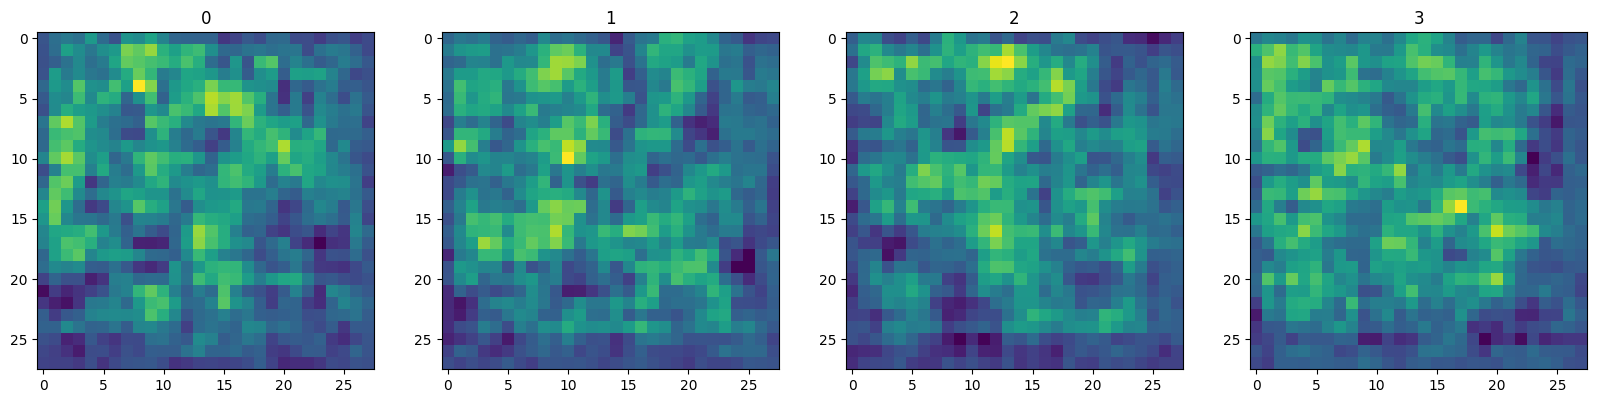

In [24]:
img = generator.predict(np.random.randn(4,128,1)) #4 images, 128 random values 

#setting up the subplot formatting
fig,ax = plt.subplots(ncols=4, figsize=(20,20))

#Looping four times and getting images
for idx, img in enumerate(img):
    
    #Plot the image using on a specific subplot
    ax[idx].imshow(np.squeeze(img))
    
    #adding image label as the subplot title
    ax[idx].title.set_text(idx)

In [25]:
#Building the discriminator

def build_discriminator():
    
    model = Sequential()
    
    #First conv block
    model.add(Conv2D(32, 5, input_shape = (28,28,1))) #32 filters/kernels with a 5x5 shape each
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    #Second conv block
    model.add(Conv2D(64, 5)) #64 filters/kernels with a 5x5 shape each
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    #Third conv block
    model.add(Conv2D(128, 5)) #128 filters/kernels with a 5x5 shape each
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    #Fourth conv block
    model.add(Conv2D(256, 5)) #256 filters/kernels with a 5x5 shape each
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    # Flatten then pass to dense layer
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid')) #1 neuron in the dense layer
    
    return model
    

In [26]:
discriminator = build_discriminator()

e:\B Tech\3rd Year Sem 2\GenAI\Coding stuff\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
discriminator.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 24, 24, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 20, 20, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 20, 20, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20, 20, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 12, 12, 256)    │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_8 (LeakyReLU)       │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │        36,865 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,113,345 (4.25 MB)

 Trainable params: 1,113,345 (4.25 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
img = generator.predict(np.random.randn(4,128,1))
print(discriminator.predict(img))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
[[0.5048306]
 [0.5049841]
 [0.5047226]
 [0.5050695]]


In [29]:
# for 1 image
discriminator.predict(np.expand_dims(img[0],0)) #since nn expects inputs in batches, the 0 in np.expand_dims adds an extra dimension in front of the current dimension i.e.
#28x28x1 which is a single image becomes 1x28x28x1 i.e. a batch with a single image thus it works in the nn

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


array([[0.5048306]], dtype=float32)

In [30]:
#Adam is the optimizer for both
from tensorflow.keras.optimizers import Adam

#Binary cross entropy is the loss function for both
from tensorflow.keras.losses import BinaryCrossentropy

In [31]:
g_opt = Adam(learning_rate = 0.0001)
d_opt = Adam(learning_rate = 0.00001) #If the discriminator learns too quickly (with a higher learning rate), it can overpower the generator, making it difficult for the generator to catch up and produce realistic outputs.
#A lower learning rate for the discriminator helps prevent it from converging too quickly, which would otherwise lead to the generator receiving weak or uninformative gradients.
g_loss = BinaryCrossentropy()
d_loss = BinaryCrossentropy()

In [32]:
tf.concat([tf.zeros_like(tf.random.normal((128, 128, 1))), tf.ones_like(tf.random.normal((128, 128, 1)))], axis = 0)

<tf.Tensor: shape=(256, 128, 1), dtype=float32, numpy=
array([[[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       ...,

       [[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]]], dtype=float32)>

In [33]:
# Importing the base model class to subclass our training step
from tensorflow.keras.models import Model

In [34]:
class FashionGAN(Model):
    def __init__(self, generator, discriminator, *args, **kwargs):
        #Pass through args and kwargs to base class
        super().__init__(*args, **kwargs)
        
        # Create attributes for gen and disc
        self.generator = generator
        self.discriminator = discriminator
    
    def compile(self, g_opt, d_opt, g_loss, d_loss, *args, **kwargs):
        #Compile with base class
        super().compile(*args, **kwargs)
        
        #Create attributes for our losses and optimizers
        self.g_opt = g_opt
        self.d_opt = d_opt
        self.g_loss = g_loss
        self.d_loss = d_loss
    
    def train_step(self, batch): #called when we call the .fit function
        #Get the data
        real_images = batch
        fake_images = self.generator(tf.random.normal((128, 128, 1)), training = False)
        
        # Train Discriminator
        with tf.GradientTape() as d_tape:
            # 1) Pass the real and fake images to the discriminator model
            yhat_real = self.discriminator(real_images, training = True)
            yhat_fake = self.discriminator(fake_images, training = True)
            yhat_realfake = tf.concat([yhat_real, yhat_fake], axis=0)
            
            # 2) Create Labels for real and fake images
            y_realfake = tf.concat([tf.zeros_like(yhat_real), tf.ones_like(yhat_fake)], axis = 0)
            
            # 3) Add some noise to the True outputs 
            noise_real = 0.15 * tf.random.uniform(tf.shape(yhat_real))
            noise_fake = -0.15 * tf.random.uniform(tf.shape(yhat_fake))
            y_realfake += tf.concat([noise_real, noise_fake], axis=0)
            
            # 4) Calculate the loss
            total_d_loss = self.d_loss(y_realfake,yhat_realfake)
            
        # 5) Apply backpropagation
        dgrad = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables)
        self.d_opt.apply_gradients(zip(dgrad, self.discriminator.trainable_variables))
            
        
        
        # Train the generator
        with tf.GradientTape() as g_tape:
            # 1) Generate some new images
            gen_images = self.generator(tf.random.normal((128, 128, 1)), training = True)
            
            # 2) Create the predicted labels
            predicted_labels = self.discriminator(gen_images, training = False)
            
            # 3) Calculate loss
            total_g_loss = self.g_loss(tf.zeros_like(predicted_labels), predicted_labels) # tf.zeros_like(predicted_labels) is considered as the true labels i.e. all generated images are considered to be real images, generator is rewarded if discriminator predicts the generated image as a real image i.e. as 0

            
        # 4) Apply backpropagation
        ggrad = g_tape.gradient(total_g_loss, self.generator.trainable_variables)
        self.g_opt.apply_gradients(zip(ggrad, self.generator.trainable_variables))
        
        
        return {"d_loss":total_d_loss, "g_loss":total_g_loss}

In [35]:
# Create instance of subclassed model
fashgan = FashionGAN(generator, discriminator)

In [36]:
# Compile the model
fashgan.compile(g_opt, d_opt, g_loss, d_loss)

In [37]:
import os 
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [38]:
#Optional

class ModelMonitor (Callback): 
    def __init__(self, num_img=3, latent_dim=128): 
        self.num_img = num_img 
        self.latent_dim = latent_dim 
        
    def on_epoch_end(self, epoch, logs=None): 
        random_latent_vectors = tf.random.uniform((self.num_img, self.latent_dim,1)) 
        generated_images = self.model.generator (random_latent_vectors) 
        generated_images *= 255 
        generated_images.numpy() 
        for i in range(self.num_img): 
            img = array_to_img(generated_images[i]) 
            img.save(os.path.join('images', f'generated_img_{epoch}_{i}.png'))

In [ ]:
hist = fashgan.fit(ds, epochs = 2000, callbacks = [ModelMonitor()])

Epoch 1/2000
469/469 ━━━━━━━━━━━━━━━━━━━━ 813s 2s/step - d_loss: 0.5640 - g_loss: 0.8049
Epoch 2/2000
469/469 ━━━━━━━━━━━━━━━━━━━━ 823s 2s/step - d_loss: 0.4415 - g_loss: 2.5493
Epoch 3/2000
469/469 ━━━━━━━━━━━━━━━━━━━━ 827s 2s/step - d_loss: 0.6764 - g_loss: 0.6368
Epoch 4/2000
469/469 ━━━━━━━━━━━━━━━━━━━━ 4145s 9s/step - d_loss: 0.5768 - g_loss: 0.3126
Epoch 5/2000
165/469 ━━━━━━━━━━━━━━━━━━━━ 8:55 2s/step - d_loss: 0.4038 - g_loss: 0.1028

In [ ]:
plt.suptitle('Loss')
plt.plot(hist.history['d_loss'], label = 'd_loss')
plt.plot(hist.history['g_loss'], label = 'g_loss')
plt.legend()
plt.show()

In [ ]:
images = generator.predict(tf.random.normal((16,128,1)))

In [ ]:
fig, ax = plt.subplots(ncols = 4, nrow = 4, figsize = (20,20))
for r in range(4):
    for c in range(4):
        ax[r][c].imshow(images[(r+1)*(c+1)-1])

In [ ]:
generator.save('generator.h5')
discriminator.save('discriminator.h5')

In [ ]:
import joblib

joblib.dump(generator, "generator.pkl")
joblib.dump(discriminator, "discriminator.pkl")